# Task 1: Data Collection and Preprocessing

**Cleaning and Preprocessing**

My goal in cleaning and preprocessing my data was to create a dataframe that had enough valid information to form a prediction through linear regression. Through the methods listed below, the amount of valid rows that will be evaluated in my multiple regression model has decreased significantly from approximately 25,000 rows to 3,307 rows. Although the amount of data has decreased, it will reveal a more accurate representation of a general population.

Dropping All Rows with Null Values


*   I first used the .info() method on the original dataframe to get a grasp of how many null values were in the dataset. I found that most of the rows had non-null values but there were few rows regarding percentages that had null values.
*   Upon investigation, the rows that had null values were typically rows that did not have a sufficient student body to collect this information. If a null value was found in one row, there was a high chance that there were null values accounted for in other columns of the same row.
*   This led me to believe that rows with null values were insignificant in regards to the larger picture of the dataset.

Dropping All Rows with Total Cohort Size Less than 200

*   It is difficult to get accurate results with regards to percent of regent graduates / local diploma graduates with a small graduating class. I wanted to only include schools with larger class sizes so that these percentages are more accurate with a larger sample size.
*   I chose the cutoff as 200 because the average class size in the state of New Jersey is approximately 227 students (calculated from the [results in this article](https://www.nj.com/education/2023/08/njs-biggest-high-school-has-3350-students-see-how-your-school-compares.html#:~:text=The%20median%20size%20for%20high,Department%20of%20Education%20data%20shows.)). I decided to round down to the nearest hundred to include schools that had a little less than the average amount of students.



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Reading in the file
url = "https://data.cityofnewyork.us/resource/vh2h-md7a.csv?$limit=25100"
og_df = pd.read_csv(url)
og_df.info()

# Dropping rows that include null values
df_no_null = og_df.dropna()

# Dropping rows that have a cohort size of less than 200
condition = df_no_null['total_cohort'] > 200

# Assigning the condition to the final dataframe
df = df_no_null[condition]

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25096 entries, 0 to 25095
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   demographic                     25096 non-null  object 
 1   dbn                             25096 non-null  object 
 2   school_name                     25096 non-null  object 
 3   cohort                          25096 non-null  object 
 4   total_cohort                    25096 non-null  int64  
 5   total_grads_n                   25096 non-null  object 
 6   total_grads_of_cohort           16704 non-null  float64
 7   total_regents_n                 25096 non-null  object 
 8   total_regents_of_cohort         16704 non-null  float64
 9   total_regents_of_grads          16652 non-null  float64
 10  advanced_regents_n              25096 non-null  object 
 11  advanced_regents_of_cohort      16704 non-null  float64
 12  advanced_regents_of_grads       

,demographic,dbn,school_name,cohort,total_cohort,total_grads_n,total_grads_of_cohort,total_regents_n,total_regents_of_cohort,total_regents_of_grads,...,regents_w_o_advanced_n,regents_w_o_advanced_of_cohort,regents_w_o_advanced_of_grads,local_n,local_of_cohort,local_of_grads,still_enrolled_n,still_enrolled_of_cohort,dropped_out_n,dropped_out_of_cohort
28,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2003,205,86,42.0,71,34.6,82.6,...,23,11.2,26.7,15,7.3,17.4,80,39.0,39,19.0
120,Total Cohort,02M400,HIGH SCHOOL FOR ENVIRONMENTAL STUDIES,2001,360,271,75.3,197,54.7,72.7,...,124,34.4,45.8,74,20.6,27.3,54,15.0,26,7.2
121,Total Cohort,02M400,HIGH SCHOOL FOR ENVIRONMENTAL STUDIES,2002,372,276,74.2,222,59.7,80.4,...,142,38.2,51.4,54,14.5,19.6,61,16.4,31,8.3
122,Total Cohort,02M400,HIGH SCHOOL FOR ENVIRONMENTAL STUDIES,2003,312,228,73.1,178,57.1,78.1,...,110,35.3,48.2,50,16.0,21.9,48,15.4,32,10.3
123,Total Cohort,02M400,HIGH SCHOOL FOR ENVIRONMENTAL STUDIES,2004,297,236,79.5,202,68.0,85.6,...,107,36.0,45.3,34,11.4,14.4,47,15.8,11,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25025,Male,31R460,SUSAN E. WAGNER HIGH SCHOOL,2003,364,247,67.9,169,46.4,68.4,...,123,33.8,49.8,78,21.4,31.6,55.0,15.1,36.0,9.9
25026,Male,31R460,SUSAN E. WAGNER HIGH SCHOOL,2004,353,227,64.3,182,51.6,80.2,...,120,34.0,52.9,45,12.7,19.8,55.0,15.6,40.0,11.3
25027,Male,31R460,SUSAN E. WAGNER HIGH SCHOOL,2005,458,298,65.1,214,46.7,71.8,...,139,30.3,46.6,84,18.3,28.2,87.0,19.0,36.0,7.9
25028,Male,31R460,SUSAN E. WAGNER HIGH SCHOOL,2006,470,328,69.8,277,58.9,84.5,...,183,38.9,55.8,51,10.9,15.5,66.0,14.0,45.0,9.6


# Task 2: Data Visualization

**Visualization 1: Heatmaps of Graduation Outcomes**

I have generated two heatmaps to show correlation between the numerical columns of the Graduation Outcomes dataset. I wanted to ensure that I was generating meaningful results with these values, so I created two heatmaps: a correlation heatmap between columns regarding counts and a correlation heatmap between columns regarding percentages. Correlations between the count values and the percentage values would not yield valid results as they are not measured according to the same metric. I wanted to find the correlation between each column to see if higher counts/percentages in one column could also predict higher counts/percentages in a different category.

The heatmap found on the left (regarding count values) shows that there is a high positive correlation in the top left of the diagram, specifically between total graduates and total regents as well as total regents and advanced regents. There are few negative correlations shown in this heatmap and plenty of correlation values lying in the range of -0.25 and 0.6. This map shows that an increasing amount of graduates could lead to an increasing amount of regents.

The heatmap found on the right (regarding percentage values) shows that there are high correlation values throughout the map, both positive and negative. Notable positive relationships (higher than 0.7) can be seen between total regents of cohort and total graduates of cohort, total regents of grads and total regents of cohorts, total regents of cohort and advanced regents of cohort, advanced regents of graduates and advanced regents of cohort, as well as local diplomas of graduates and local diplomas of cohorts. Strong negative relationships (less than -0.7) can be seen in the top right and bottom left regions of the heatmap between regents of cohort and local diplomas, total graduates and students still enrolled, as well as total graduates and dropout students. This map shows a general trend that an increasing percentage of regents and graduates lead to fewer dropouts.

<ipython-input-4-f451c4263cf7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['total_grads_n', 'total_regents_n', 'advanced_regents_n', 'regents_w_o_advanced_n', 'local_n', 'still_enrolled_n', 'dropped_out_n']] = df[['total_grads_n', 'total_regents_n', 'advanced_regents_n', 'regents_w_o_advanced_n', 'local_n', 'still_enrolled_n', 'dropped_out_n']].astype(float)


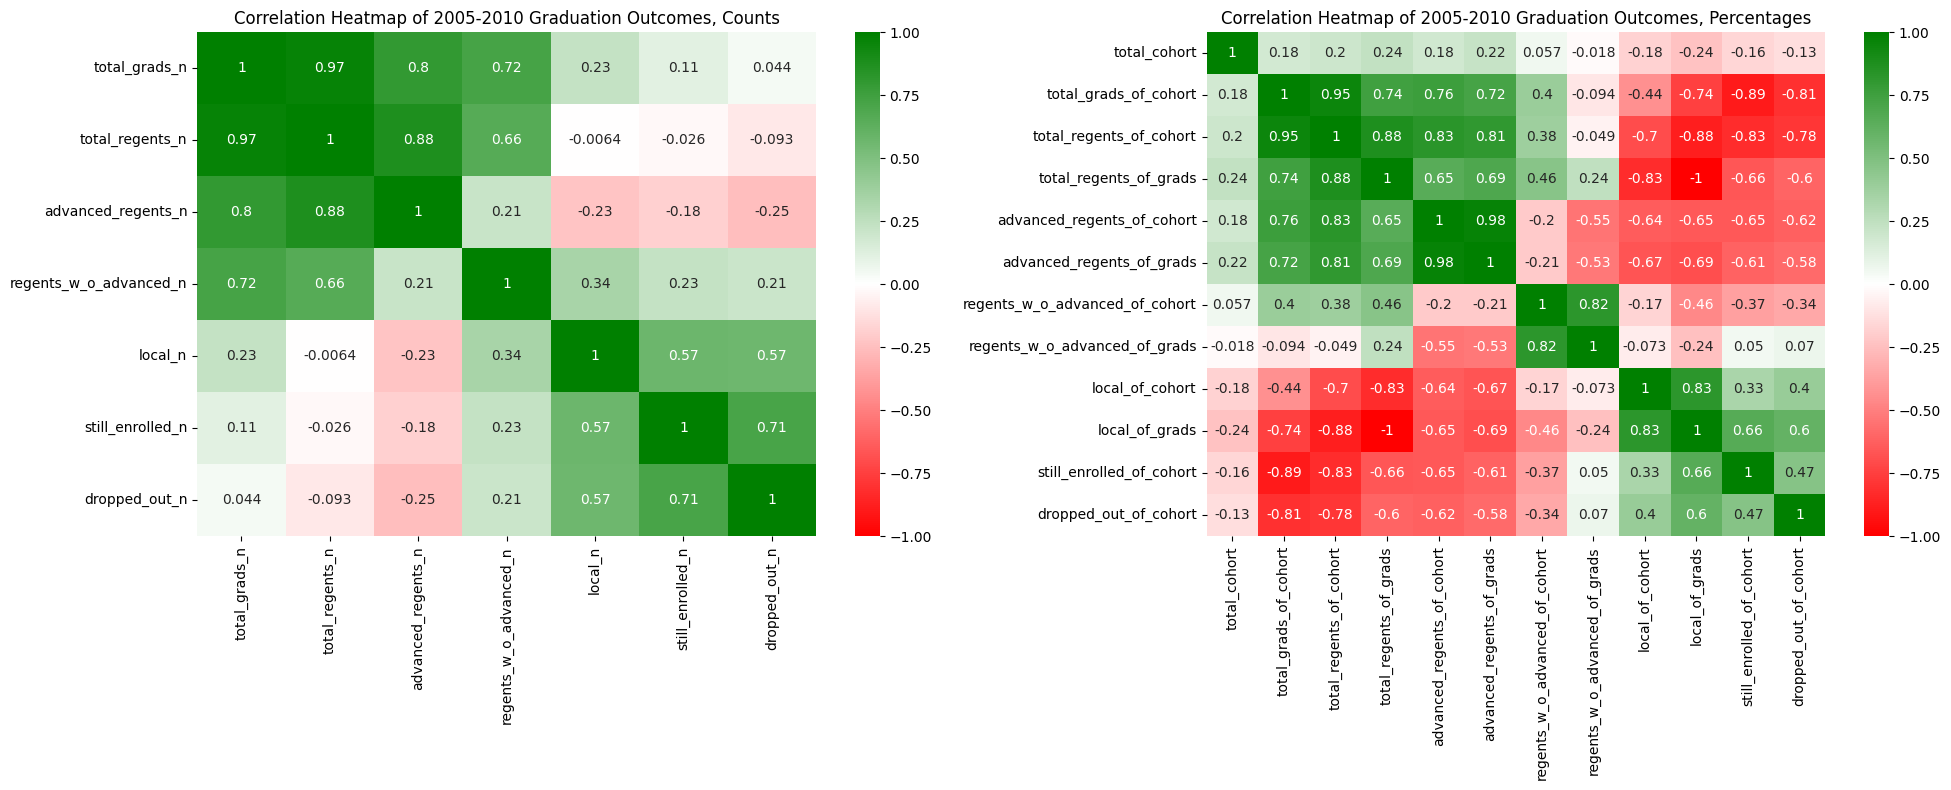

In [ ]:
#Define colors
colors = ["red", "white", "green"]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_rg", colors)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Change data types from string to floats
df[['total_grads_n', 'total_regents_n', 'advanced_regents_n', 'regents_w_o_advanced_n', 'local_n', 'still_enrolled_n', 'dropped_out_n']] = df[['total_grads_n', 'total_regents_n', 'advanced_regents_n', 'regents_w_o_advanced_n', 'local_n', 'still_enrolled_n', 'dropped_out_n']].astype(float)

# Create Heatmap for Counts in Dataset
df_nums = df.select_dtypes(include='number')
df_nums = df_nums.filter(like='_n')
df_nums_corr = df_nums.corr()
sns.heatmap(df_nums_corr, annot = True, cmap = custom_cmap, vmin = -1, vmax = 1, ax=ax[0])
ax[0].set_title('Correlation Heatmap of 2005-2010 Graduation Outcomes, Counts')

# Create Heatmap for Percentages in Dataset
df_percent = df.select_dtypes(include='number').drop(columns=['total_grads_n', 'total_regents_n', 'advanced_regents_n', 'regents_w_o_advanced_n', 'local_n', 'still_enrolled_n', 'dropped_out_n'])
df_perc_corr = df_percent.corr()
sns.heatmap(df_perc_corr, annot = True, cmap = custom_cmap, vmin = -1, vmax = 1, ax=ax[1])
ax[1].set_title('Correlation Heatmap of 2005-2010 Graduation Outcomes, Percentages')

plt.tight_layout()

**Visualization 2: Bar Charts of Demographic Relations**

I created 12 Bar charts to see how school demographics relate to each numerical category. The first bar chart at the top left indicates the amount of schools that pertain to each demographic. Most schools encompass a general population and are denoted by the categories "English Proficient Schools", "General Education Studies", and "Total Cohort". According to the chart, there are about 1,765 schools in these three categories alone, meaning that most of the schools that will be analyzed in this dataset will be a general population. There are still significant numbers of schools in each demographic, which indicated to me that studying the demographics in each category would yield interpretable results.

The following 11 bar charts relate demographics on the x-axis with columns that include percentage data on the y-axis. I did not relate demographics to the count data with bar charts because I figured that comparing average percentages would allow for a more fair comparison of demographic. There is a higher chance for outliers to be present in the count data compared to outliers in the percentage data, due to varying school class size.

In summary, I found that schools with a prominent white and Asian demographic have higher percentages of graduating students, regents students, and advanced regents students compared to other demographics. English Language Learners have lower percentages of graduates, regents, and advanced regents students compared to the other demographics. The other demographics seem to have an equal percentage in these categories. English Language Learners have a high percentage of students in a cohort that are still enrolled when their class is supposed to graduate. They also have a high percentage of dropouts. Black schools have a high percentage of students that earn a local diploma. Asian and White schools have a relatively low percentage of students that earn local diplomas as well as low percentages of students that are still enrolled.

These trends show that there could be a correlation between a school's demographic and their student's performances. This is especially visible with the performance of English Language Learners and schools that have large White and Asian populations.

<ipython-input-5-340bf93cb5b4>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0, 0].set_xticklabels(categories, rotation=30, ha='right')
<ipython-input-5-340bf93cb5b4>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0, 1].set_xticklabels(categories, rotation=30, ha='right')
<ipython-input-5-340bf93cb5b4>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1, 0].set_xticklabels(categories, rotation=30, ha='right')
<ipython-input-5-340bf93cb5b4>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1, 1].set_xticklabels(categories, rotation=30, ha='right')
<ipython-input-5-340bf93cb5b4>:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2, 0].set_xticklabels(categories, rotation=30, ha='right')
<ipython-input-5-340bf93cb5b4>:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2, 1].set_xtick

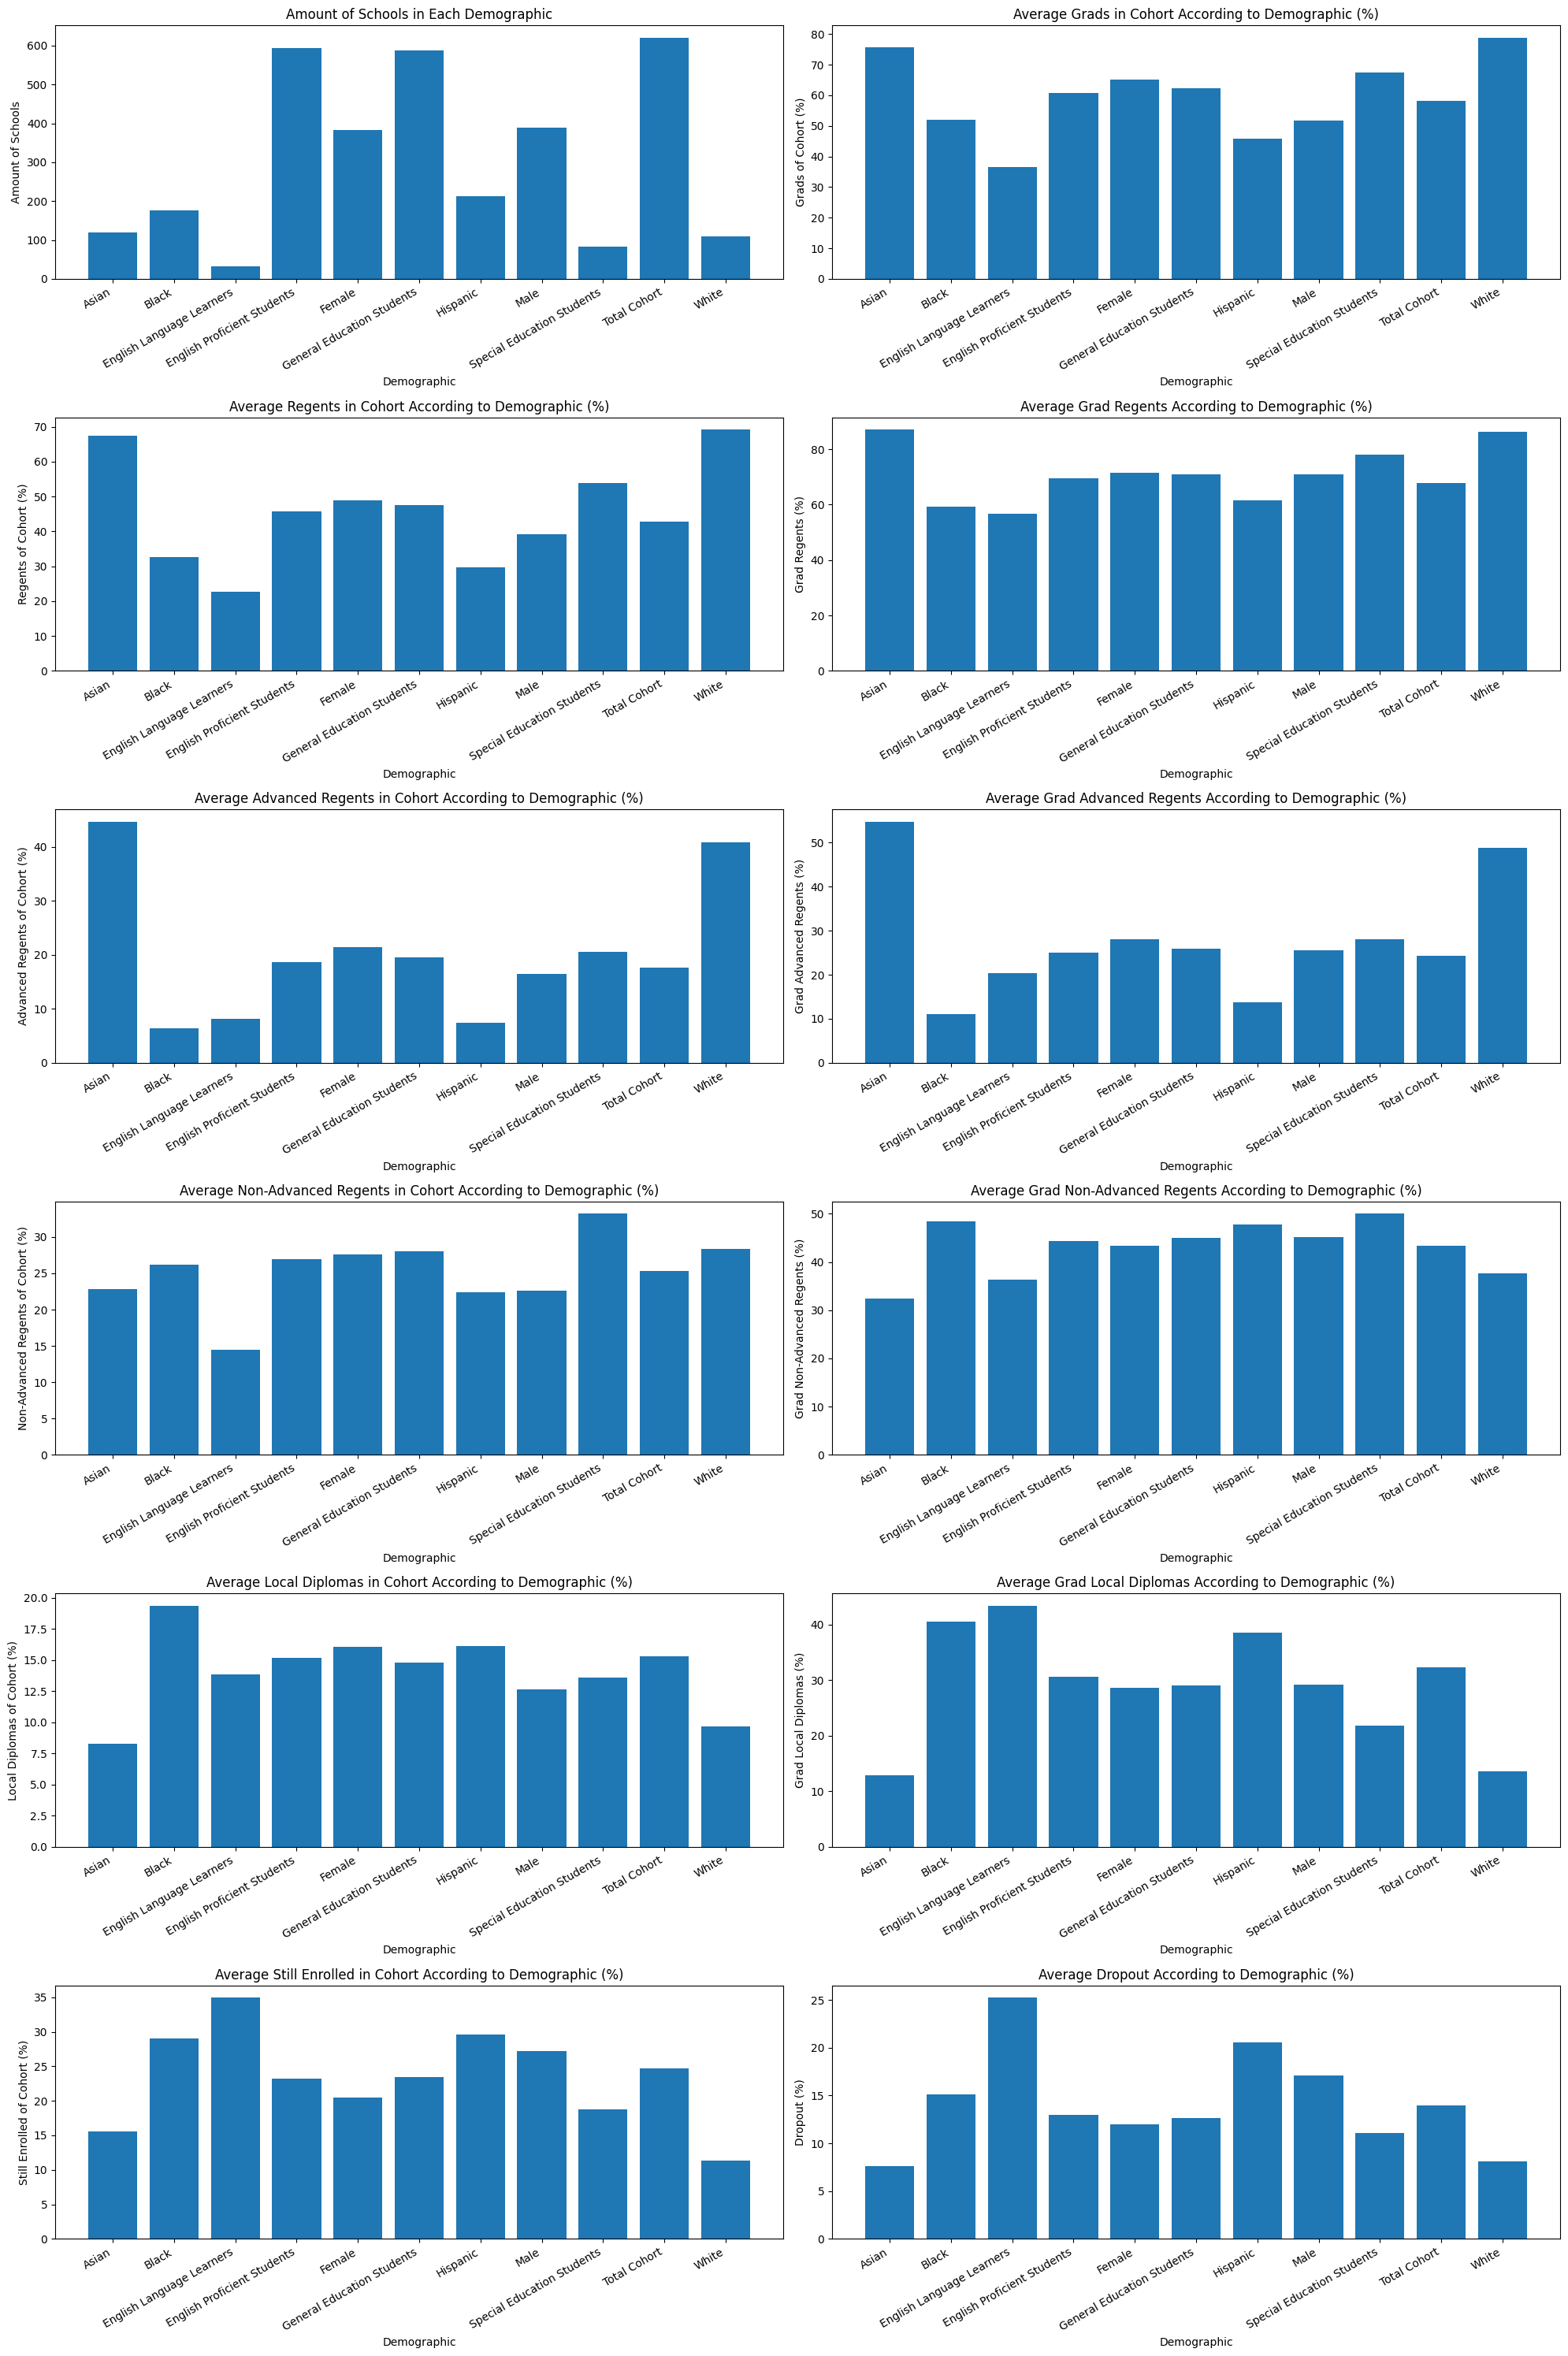

In [ ]:
df['demographic'].unique()

fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(20, 30))

# Plotting Amount of Schools in Each Demographic
demo_count = df.groupby('demographic')['total_cohort'].count()
categories = demo_count.index

ax[0, 0].bar(categories, demo_count)
ax[0, 0].set_title("Amount of Schools in Each Demographic")
ax[0, 0].set_xlabel("Demographic")
ax[0, 0].set_ylabel("Amount of Schools")
ax[0, 0].set_xticklabels(categories, rotation=30, ha='right')

# Plotting Average Grads in Cohort According to Demographic
co_grad = df.groupby('demographic')['total_grads_of_cohort'].mean()
values = co_grad.values

ax[0, 1].bar(categories, values)
ax[0, 1].set_title("Average Grads in Cohort According to Demographic (%)")
ax[0, 1].set_xlabel("Demographic")
ax[0, 1].set_ylabel("Grads of Cohort (%)")
ax[0, 1].set_xticklabels(categories, rotation=30, ha='right')

# Plotting Average Regents in Cohort According to Demographic
co_reg = df.groupby('demographic')['total_regents_of_cohort'].mean()
values = co_reg.values

ax[1, 0].bar(categories, values)
ax[1, 0].set_title("Average Regents in Cohort According to Demographic (%)")
ax[1, 0].set_xlabel("Demographic")
ax[1, 0].set_ylabel("Regents of Cohort (%)")
ax[1, 0].set_xticklabels(categories, rotation=30, ha='right')

# Plotting Average Grad Regents According to Demographic
grad_reg = df.groupby('demographic')['total_regents_of_grads'].mean()
values = grad_reg.values

ax[1, 1].bar(categories, values)
ax[1, 1].set_title("Average Grad Regents According to Demographic (%)")
ax[1, 1].set_xlabel("Demographic")
ax[1, 1].set_ylabel("Grad Regents (%)")
ax[1, 1].set_xticklabels(categories, rotation=30, ha='right')

# Plotting Average Advanced Regents in Cohort According to Demographic
co_adv = df.groupby('demographic')['advanced_regents_of_cohort'].mean()
values = co_adv.values

ax[2, 0].bar(categories, values)
ax[2, 0].set_title("Average Advanced Regents in Cohort According to Demographic (%)")
ax[2, 0].set_xlabel("Demographic")
ax[2, 0].set_ylabel("Advanced Regents of Cohort (%)")
ax[2, 0].set_xticklabels(categories, rotation=30, ha='right')

# Plotting Average Advanced Grad Regents According to Demographic
grad_adv = df.groupby('demographic')['advanced_regents_of_grads'].mean()
values = grad_adv.values

ax[2, 1].bar(categories, values)
ax[2, 1].set_title("Average Grad Advanced Regents According to Demographic (%)")
ax[2, 1].set_xlabel("Demographic")
ax[2, 1].set_ylabel("Grad Advanced Regents (%)")
ax[2, 1].set_xticklabels(categories, rotation=30, ha='right')

# Plotting Average Non-Advanced Regents in Cohort According to Demographic
co_non_reg = df.groupby('demographic')['regents_w_o_advanced_of_cohort'].mean()
values = co_non_reg.values

ax[3, 0].bar(categories, values)
ax[3, 0].set_title("Average Non-Advanced Regents in Cohort According to Demographic (%)")
ax[3, 0].set_xlabel("Demographic")
ax[3, 0].set_ylabel("Non-Advanced Regents of Cohort (%)")
ax[3, 0].set_xticklabels(categories, rotation=30, ha='right')

# Plotting Average Advanced Grad Regents According to Demographic
grad_non_reg = df.groupby('demographic')['regents_w_o_advanced_of_grads'].mean()
values = grad_non_reg.values

ax[3, 1].bar(categories, values)
ax[3, 1].set_title("Average Grad Non-Advanced Regents According to Demographic (%)")
ax[3, 1].set_xlabel("Demographic")
ax[3, 1].set_ylabel("Grad Non-Advanced Regents (%)")
ax[3, 1].set_xticklabels(categories, rotation=30, ha='right')

# Plotting Average Local Diplomas in Cohort According to Demographic
co_loc = df.groupby('demographic')['local_of_cohort'].mean()
values = co_loc.values

ax[4, 0].bar(categories, values)
ax[4, 0].set_title("Average Local Diplomas in Cohort According to Demographic (%)")
ax[4, 0].set_xlabel("Demographic")
ax[4, 0].set_ylabel("Local Diplomas of Cohort (%)")
ax[4, 0].set_xticklabels(categories, rotation=30, ha='right')

# Plotting Average Grad Local Diplomas According to Demographic
grad_loc = df.groupby('demographic')['local_of_grads'].mean()
values = grad_loc.values

ax[4, 1].bar(categories, values)
ax[4, 1].set_title("Average Grad Local Diplomas According to Demographic (%)")
ax[4, 1].set_xlabel("Demographic")
ax[4, 1].set_ylabel("Grad Local Diplomas (%)")
ax[4, 1].set_xticklabels(categories, rotation=30, ha='right')

# Plotting Average Still Enrolled in Cohort According to Demographic
co_enroll = df.groupby('demographic')['still_enrolled_of_cohort'].mean()
values = co_enroll.values

ax[5, 0].bar(categories, values)
ax[5, 0].set_title("Average Still Enrolled in Cohort According to Demographic (%)")
ax[5, 0].set_xlabel("Demographic")
ax[5, 0].set_ylabel("Still Enrolled of Cohort (%)")
ax[5, 0].set_xticklabels(categories, rotation=30, ha='right')

# Plotting Average Dropout According to Demographic
co_drop = df.groupby('demographic')['dropped_out_of_cohort'].mean()
values = co_drop.values

ax[5, 1].bar(categories, values)
ax[5, 1].set_title("Average Dropout According to Demographic (%)")
ax[5, 1].set_xlabel("Demographic")
ax[5, 1].set_ylabel("Dropout (%)")
ax[5, 1].set_xticklabels(categories, rotation=30, ha='right')

# still_enrolled_of_cohort | dropped_out_of_cohort

plt.tight_layout()

# Summary

**Description of Dataset**

The dataset that I have chosen includes data regarding 2005-2010 Graduation Outcomes in New York City. Each row represents a school's graduation outcome for a specific year, indicating how many students have graduated, the types of diplomas students have received, and how many students have dropped out or are still enrolled in the school.

Some background information is necessary to further understand what certain values and columns mean. Students can graduate with one of the following three diplomas:
*  *Local Diploma*: The local diploma is awarded to students who have completed the minimum requirements for high school graduation, but have not met the requirements for a Regents Diploma.
Students must complete a certain number of credits in required subjects such as English, math, science, social studies, and physical education.
*  *Regents Diploma*: The Regents Diploma is a more rigorous diploma option that requires students to meet specific academic standards. To earn a Regents Diploma, students must complete a set number of required credits in core subjects as well as pass corresponding Regents exams in those subjects. These exams typically include English Language Arts, mathematics, science, and social studies.
*  *Advanced Regents Diploma*: The Advanced Regents Diploma is an even more demanding diploma option that signifies a higher level of academic achievement.In addition to meeting the requirements for a Regents Diploma, students pursuing an Advanced Regents Diploma must complete additional coursework and pass more rigorous Regents exams.
The additional coursework for an Advanced Regents Diploma often includes advanced math and science courses, additional credits in languages other than English, and completion of a Regents exam in a language other than English.

There are 23 columns in this dataset which are listed below:

*  demographic: The main demographic of the school or the demographic that the school is catered towards. Unique values in this field are Asian, Black, English Language Learners, English Proficient Students, Female, General Education Students, Hispanic, Male, Special Education Students, Total Cohort, White.
*  dbn: District Borough Number
*  school_name: Name of the school
*  cohort: the year in which a group of students enters a particular grade level or program together. These students are expected to graduate in the same year.
*  total_cohort: Number of students in a cohort with respect to the school.
*  total_grads_n: Number of students that graduated in the cohort.
*  total_grads_of_cohort: Percent of students that graduated in the cohort.
*  total_regents_n: Number of students that graduated with a regents diploma in the cohort.
*  total_regents_of_cohort: Percentage of students that graduated with a regents diploma in the cohort.
*  total_regents_of_grads: Percentage of students that graduated with a regents diploma.
*  advanced_regents_n: Number of students that graduated with an advanced regents diploma in the cohort.
*  advanced_regents_of_cohort: Percentage of students that graduated with an advanced regents diploma in the cohort.
*  advanced_regents_of_grads: Percentage of students that graduated with an advanced regents diploma.
*  regents_w_o_advanced_n: Number of regents that graduated without an advanced regents diploma in the cohort.
*  regents_w_o_advanced_of_cohort: Percentage of regents that graduated without an advanced regents diploma in the cohort.
*  regents_w_o_advanced_of_grads: Percentage of regents that graduated without an advanced regents diploma.
*  local_n: Number of students that graduated with a local diploma in the cohort.
*  local_of_cohort: Percentage of students that graduated with a local diploma in the cohort.
*  local_of_grads: Percentage of students that graduated with a local diploma.
*  still_enrolled_n: Number of students that are still enrolled in high school in the cohort.
*  still_enrolled_of_cohort: Percentage of students that are still enrolled in high school in the cohort.
*  dropped_out_n: Number of students that have dropped out from high school from the cohort.
*  dropped_out_of_cohort: Percentage of students that have dropped out from high school from the cohort.


This dataset can be found at the following link: https://data.cityofnewyork.us/Education/2005-2010-Graduation-Outcomes-School-Level/vh2h-md7a/about_data

**Selected Features**

I chose this dataset with the aim of investigating whether there are notable patterns in academic achievement across schools with different demographic profiles. I wanted to also see if the amount of students that graduate with higher status (regents diplomas) would cause less students to drop out or receive lower-status diplomas. These rates could determine if a school's education practices were effective. This is why I chose to focus on demographic (demographic), dropouts (dropped_out_of_cohort), students who earned a local diploma (local_of_cohort), and the total regents (total_regents_of_cohort). I chose the columns with percent values because that is what I analyzed with the bar charts and outliers would have less of an effect on the results when using the percent values. I chose the percentage total regents of the cohort rather than the total regents of the graduates so all the features evaluated could be more standardized, as they would all be calculated out of the cohort.

**Target of Model**

I wanted to combine these factors listed above together through a multiple regression model to see if a demographic of students, the percentage of dropouts, and the percentage of students who graduate with a local diploma would affect the percentage of students that graduate with a regents diploma. This means that the target of my model is the total regents of the cohort.

# Task 3: Regression Analysis

**Creating a Regression Model**

Selected Features: total_regents_of_cohort, dropped_out_of_cohort, local_of_cohort, demographic

Predictor Features: dropped_out_of_cohort, local_of_cohort, demographic

Target Feature: total_regents_of_cohort

Categorical Variable: demographic

Numerical Variables: total_regents_of_cohort, dropped_out_of_cohort, local_of_cohort

The code below creates a multiple regression model according to the features listed above with the target feature being the percentage of the total regents of a cohort. This is done through the pipeline feature from SciKitLearn. This helps encode the categorical variable of demographic through one-hot encoding.

The intercept and coefficients of the model are printed. To make the output for the coefficients more understandable for the audience, I used the "get_feature_names_out" method to find the features associated with each coefficient, since there is a great number of coefficients.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# from sklearn import linear_model

X = df[["dropped_out_of_cohort", "local_of_cohort", "demographic"]]
y = df["total_regents_of_cohort"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Put data through pipeline
pipe = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value=0)),
                 ('encoder', OneHotEncoder(handle_unknown='ignore')),
                 ('model', LinearRegression())])

pipe.fit(X_train, y_train)

y_test_pred = pipe.predict(X_test)
model = pipe.named_steps['model']
coefficients = model.coef_

# Get feature names after one-hot encoding
encoded_feature_names = pipe.named_steps['encoder'].get_feature_names_out(input_features=["dropped_out_of_cohort", "local_of_cohort", "demographic"])

# Associate feature names with coefficients
feature_coefficients = dict(zip(encoded_feature_names, coefficients))

print("Intercept:", model.intercept_)
print("Feature Coefficients:")
for feature, coefficient in feature_coefficients.items():
    print(f"{feature}: {coefficient}")

Intercept: 34.06759538881707
Feature Coefficients:
dropped_out_of_cohort_0.0: 26.36788455489061
dropped_out_of_cohort_0.1: 27.302191431522868
dropped_out_of_cohort_0.2: 25.93610408973405
dropped_out_of_cohort_0.3: 25.74656902767796
dropped_out_of_cohort_0.4: 20.89419867805374
dropped_out_of_cohort_0.5: 29.267416576189667
dropped_out_of_cohort_0.6: 32.97922327336163
dropped_out_of_cohort_0.7: 21.15120170959116
dropped_out_of_cohort_0.8: 12.40905842509024
dropped_out_of_cohort_0.9: 13.35865442671283
dropped_out_of_cohort_1.0: 18.851498667464345
dropped_out_of_cohort_1.1: 28.790589680506553
dropped_out_of_cohort_1.2: 24.863223932643383
dropped_out_of_cohort_1.3: 29.918587810040012
dropped_out_of_cohort_1.4: 21.876340488333742
dropped_out_of_cohort_1.5: 19.46445653122143
dropped_out_of_cohort_1.6: 22.7255707443071
dropped_out_of_cohort_1.7: 34.51598998664079
dropped_out_of_cohort_1.8: 30.23720336949137
dropped_out_of_cohort_1.9: 23.632606803547084
dropped_out_of_cohort_2.0: 32.144374596372

**Interpreting the Learned Parameters**

After analyzing the list of coefficients produced from the code above, these patterns are apparent:


*   As the percentage of people who drop out of the cohort increase, the percentage of regents in the cohort decrease. This is visible when the percentage of students who drop out is at approximately 15%, as the coefficients in the model are consistently negative numbers past this point. This indicates a negative relationship between dropouts and regents graduates.
*   As the percentage of people who earn local diplomas in the cohort increase, the percentage of regents in the cohort decrease. This is visible when the percentage of students who earn local diplomas is at approximately 19%, as the coefficients in the model are consistently negative numbers past this point. This indicates a negative relationship between local diploma graduates and regents graduates.
*   Looking at the demographics, positive coefficients were produced from Asian, Female, General Education, Special Education, and White dominated schools. This means that these schools produced a high amount of regents graduates. The coefficient for white schools is approximately 9.362, which is significantly higher than the other demographics with positive coefficients, which are all around 2. This means that white populated schools tend to perform higher than the other schools. This could be due to several factors not explored in this dataset including a disparity in funding, students' economic status, systemic racism, and resource accessibility.
*   Continuing to analyze the results from the demographics, negative coefficients were produced from Black, English Language Learners, English Proficient Students, Hispanic, Male, and Total Cohort dominated schools. This means that these schools tend to produce a lower amount of regents graduates, all other variables held constant. English Language Learners seem to be the most effected as their coefficient was the lowest of -7.305. These differences could be due to the language barrier as well as the other factors listed previously.



**Making a Prediction**

I made a prediction using the data split for testing. I arbitrarily chose the second row in the set as shown below. The model predicted that in a school with a demographic of English Proficient Students, in which 6.5% of students dropped out and 8.4% graduated with a local diploma, approximately 65.3% would graduate with a regents diploma. When comparing this with the true value of 69.2% regents graduates, the error seems to be small with only a 4% difference. This shows that the predictions made by the model can be trusted.

In [ ]:
features_for_prediction = X_test.iloc[2:3]
prediction = pipe.predict(features_for_prediction)
print(features_for_prediction)
print("Prediction:", prediction, "\n")

prediction_index = X_test.index[2]
actual_value = df.loc[prediction_index, "total_regents_of_cohort"]
actual_features = X_test.loc[[prediction_index]]
print(actual_features)
print("Actual Value:", actual_value)

      dropped_out_of_cohort  local_of_cohort                  demographic
6417                    6.5              8.4  English Proficient Students
Prediction: [65.26204316] 

      dropped_out_of_cohort  local_of_cohort                  demographic
6417                    6.5              8.4  English Proficient Students
Actual Value: 69.2


# Task 3 (Part 2): Evaluation Metrics

**R2 Score: 0.729**

An r-squared score of 0.729 implies a strong relationship between the percentage of local diploma graduates, the percentage of dropouts, and the demographic features with the percentage of regents graduates incorporated into the model. This suggests that the model fits the data well and effectively captures a significant portion of the variability in the target variable.

There are many factors that could explain why this score is not higher. The region and district could also cause variability in the percent of regents students, which are unaccounted factors in this model. The school's funding and the school's size could also play a part in how many students graduate with a regents diploma. These factors could be crucial in determining how a cohort may perform, as school's with less funding may not be able to acquire necessary resources to advance a student's education appropriately.

In [ ]:
r2_test = pipe.score(X_test, y_test)
print("R² score on test set:", r2_test)

R² score on test set: 0.7293468274139352


**Mean Absolute Error: 8.759**

The mean absolute error for this model is 8.759, which means that on average, the model will predict a result that is 8.8% away from the true value of the regents graduates. A disadvantage of this evaluation metric is that large errors in prediction hold the same weight as lesser errors, but the direction and consistency of the errors are evaluated well using this metric over the mean squared error.

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_test_pred)
print(mae)

156.42234481189104


**Visualization: Plotting Residuals**

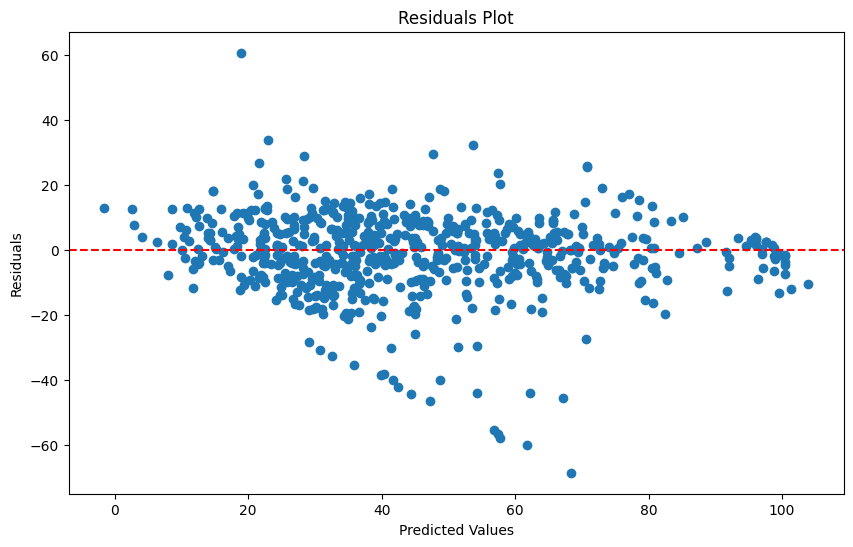

In [ ]:
residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

**Visualization: Actual Values vs. Predicted Values**

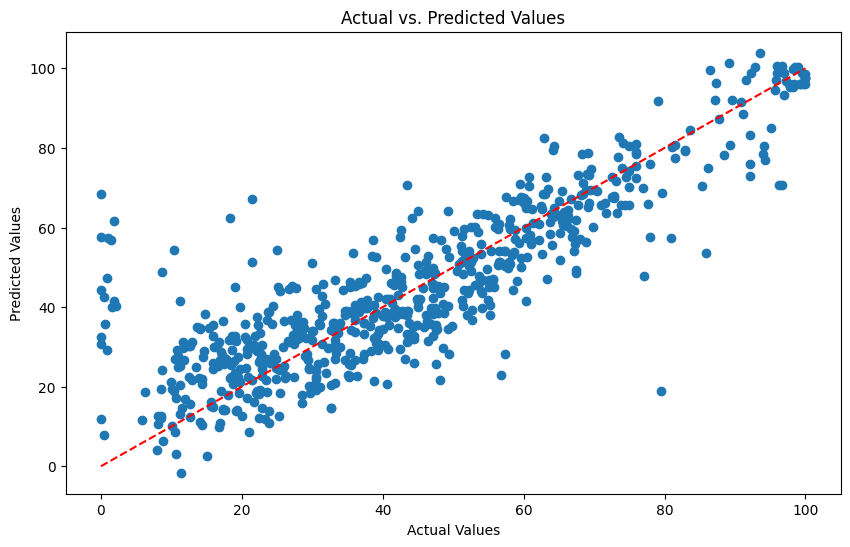

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()